# K近邻算法

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# 初始化训练数据raw_data_x ，raw_data_y
raw_data_x = [[3.3935, 2.3321],
 [3.1100, 1.7815],
 [1.3438, 3.3683],
 [3.5822, 4.6791],
 [2.2803, 2.8669],
 [7.4234, 4.6965],
 [5.7450, 3.5339],
 [9.1721, 2.5111],
 [7.7927, 3.4240],
 [7.9398, 0.7916]]

raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [44]:
# 装换为numpy数组
X_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

# X_train是二维数组，在数学上就是矩阵，机器学习中很多运算都是矩阵运算
X_train

array([[3.3935, 2.3321],
       [3.11  , 1.7815],
       [1.3438, 3.3683],
       [3.5822, 4.6791],
       [2.2803, 2.8669],
       [7.4234, 4.6965],
       [5.745 , 3.5339],
       [9.1721, 2.5111],
       [7.7927, 3.424 ],
       [7.9398, 0.7916]])

In [39]:
x_train.shape

(10, 2)

In [45]:
# 设置target，假设0是良性肿瘤，1是恶性肿瘤
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [14]:
# y_train==0结果是一个boolean数组
y_train==0

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [15]:
# 通过boolean数组y_train==0取x_train向量中的前5行，第一列数据
x_train[y_train==0, 0]

array([3.3935, 3.11  , 1.3438, 3.5822, 2.2803])

In [18]:
# 通过boolean数组y_train==0取x_train向量中的前5行，第二列数据
x_train[y_train==0, 1]

array([2.3321, 1.7815, 3.3683, 4.6791, 2.8669])

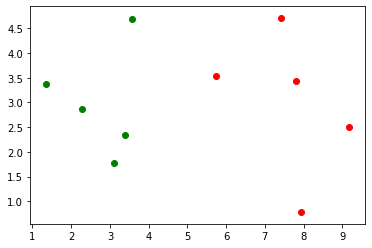

In [41]:
# 数据在特征平面中的位置

# x_train向量中的前5行，第一列数据 作为x轴。x_train向量中的前5行，第二列数据 作为y轴，绘制绿色散点图
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0,1], color='g')

# x_train向量中的后5行，第一列数据 作为x轴。x_train向量中的后5行，第二列数据 作为y轴，绘制红色散点图
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1,1], color='r')

plt.show()

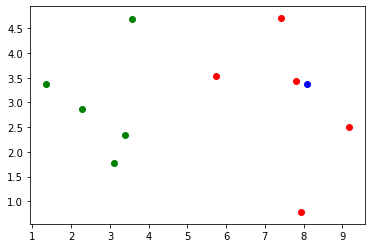

In [23]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0,1], color='g')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1,1], color='r')

# 添加一个新的点到图中
# 使用KNN算法分析结果，x属于恶性肿瘤
x = np.array([8.0936, 3.3657])
plt.scatter(x[0], x[1], color='b')
plt.show()

In [26]:
# 计算x到x_train所有点的距离
from math import sqrt
# 存储距离
distances = []
# 遍历二维数组x_train
for dot in x_train:
    # 计算坐标系中两点之间的距离
    # 点dot的x、y坐标值 减去 点x的x、y坐标值，再平方
    # (np.sum((dot - x)**2) 即 (x1 - x0)^2 + (y1 -y0)^2
    # sqrt 计算平方根
    # d就是两点之间的距离
    d = sqrt(np.sum((dot - x)**2))
    distances.append(d)

distances

[4.812407814182003,
 5.22933634412628,
 6.749800500755559,
 4.698696576711461,
 5.834660086928801,
 1.4900324425998253,
 2.354615297665417,
 1.3760462964595341,
 0.3064958401022765,
 2.578690607653427]

In [28]:
# 使用python中的生成表达式
distances = [sqrt(np.sum((dot -x)**2)) for dot in x_train]
distances

[4.812407814182003,
 5.22933634412628,
 6.749800500755559,
 4.698696576711461,
 5.834660086928801,
 1.4900324425998253,
 2.354615297665417,
 1.3760462964595341,
 0.3064958401022765,
 2.578690607653427]

In [30]:
# 对距离数组distances排序，获取排序后的索引值
nearest = np.argsort((distances))
# nearest 就是距离x点，从近到远 的点
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [31]:
# 假设k是6，求和x距离最近的6个点的分类
k = 6;
top_k_target = [y_train[i] for i in nearest[:k]]
top_k_target
# 结果中有5个属于恶性肿瘤，1个属于良性肿瘤

[1, 1, 1, 1, 1, 0]

In [34]:
from collections import Counter
# 统计元素出现的个数
# 1出现5次，0出现1次
votes = Counter(top_k_target)
votes

Counter({1: 5, 0: 1})

In [35]:
# 找出票数最多的元素
votes.most_common(1)

[(1, 5)]

In [37]:
# votes.most_common(1)[0]是一个元组，取元组的第一个元素
predict_target = votes.most_common(1)[0][0]
predict_target

1